In [3]:
import numpy as np

# matplotlib imports
import matplotlib.pyplot as plt
# needed for Jupyter notebooks.
%matplotlib inline

In [4]:
import xarray as xr

In [9]:
data = np.loadtxt('C:\\Users\srv_veralab\Downloads\populations.txt')

In [10]:
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [11]:
data[:,0]

array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920.])

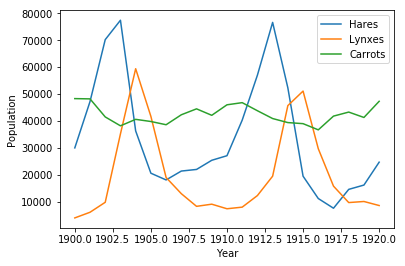

In [12]:
plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,2])
plt.plot(data[:,0], data[:,3])
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Hares', 'Lynxes', 'Carrots'], loc = 'upper right')

In [14]:
data.mean()

24639.404761904763

In [15]:
np.mean(data, axis = 0)

array([ 1910.        , 34080.95238095, 20166.66666667, 42400.        ])

In [16]:
data.mean(axis = 0)

array([ 1910.        , 34080.95238095, 20166.66666667, 42400.        ])

In [20]:
data.T

array([[ 1900.,  1901.,  1902.,  1903.,  1904.,  1905.,  1906.,  1907.,
         1908.,  1909.,  1910.,  1911.,  1912.,  1913.,  1914.,  1915.,
         1916.,  1917.,  1918.,  1919.,  1920.],
       [30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
        22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
        11200.,  7600., 14600., 16200., 24700.],
       [ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
         8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
        29700., 15800.,  9700., 10100.,  8600.],
       [48300., 48200., 41500., 38200., 40600., 39800., 38600., 42300.,
        44500., 42100., 46000., 46800., 43800., 40900., 39400., 39000.,
        36700., 41800., 43300., 41300., 47300.]])

In [21]:
year, hares, lynxes, carrots = data.T 

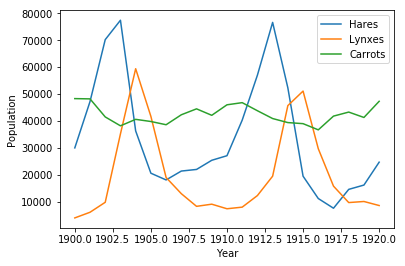

In [22]:
plt.plot(year, hares)
plt.plot(year, lynxes)
plt.plot(year, carrots)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Hares', 'Lynxes', 'Carrots'], loc = 'upper right')

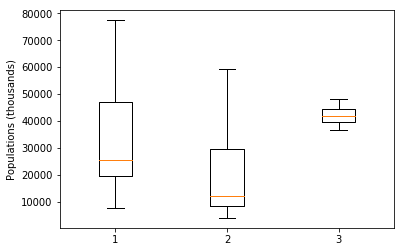

In [23]:
plt.boxplot([hares, lynxes, carrots])
#plt.xlabel('hares, lynxes, carrots')
plt.ylabel('Populations (thousands)')
labels = ('hares', 'lynxes', 'carrots')

In [24]:
print(hares.mean())
print(lynxes.mean())
print(carrots.mean())

34080.95238095238
20166.666666666668
42400.0


In [25]:
((year >= 1903) & (year <= 1910)) |((year >= 1917) & (year <= 1918))

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False])

In [26]:
hmask = ((year >= 1903) & (year <= 1910)) |((year >= 1917) & (year <= 1918))

In [27]:
hmask

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False])

In [28]:
lynxes_masked = np.ma.masked_where(hmask,lynxes)

In [29]:
lynxes_masked

masked_array(data=[4000.0, 6100.0, 9800.0, --, --, --, --, --, --, --, --,
                   8000.0, 12300.0, 19500.0, 45700.0, 51100.0, 29700.0,
                   --, --, 10100.0, 8600.0],
             mask=[False, False, False,  True,  True,  True,  True,  True,
                    True,  True,  True, False, False, False, False, False,
                   False,  True,  True, False, False],
       fill_value=1e+20)

In [30]:
hares_masked = np.ma.masked_where(hmask,hares)

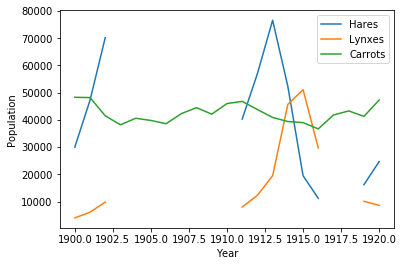

In [31]:
plt.plot(year, hares_masked)
plt.plot(year, lynxes_masked)
plt.plot(year, carrots)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Hares', 'Lynxes', 'Carrots'], loc = 'upper right')

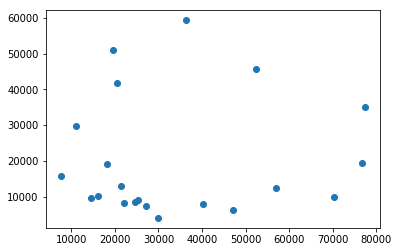

In [33]:
plt.scatter(hares,lynxes)

In [38]:
x = hares
y = lynxes


In [39]:
x

array([30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
       22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
       11200.,  7600., 14600., 16200., 24700.])

In [40]:
y

array([ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
        8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
       29700., 15800.,  9700., 10100.,  8600.])

In [43]:
# generate related variables
from numpy import mean
from numpy import std
from matplotlib import pyplot

In [50]:
np.corrcoef(hares,lynxes)

array([[1.        , 0.07189206],
       [0.07189206, 1.        ]])

In [51]:
np.corrcoef(carrots,lynxes)

array([[ 1.        , -0.68057717],
       [-0.68057717,  1.        ]])

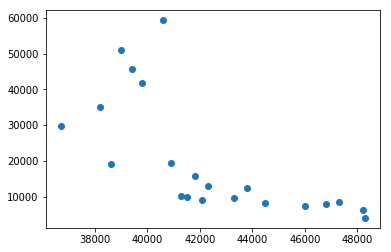

In [52]:
plt.scatter(carrots,lynxes)